In [1]:
%matplotlib inline

In [2]:
from kid_readout.measurement import basic
from kid_readout.measurement.io import nc

In [3]:
ncf = nc.NCFile('/data/detectors/2016-05-09_122013_lo_scan.nc')

In [4]:
sa = ncf.SweepArray0

In [5]:
scan = sa.as_class(basic.Scan)

In [6]:
len(scan.stream_arrays)

50

In [10]:
len(scan.stream_arrays) * scan.stream_arrays[0].tone_bin.size

6400

In [9]:
scan.ascending_order

array([   0, 5376, 2560, ..., 3455, 3071, 6399])

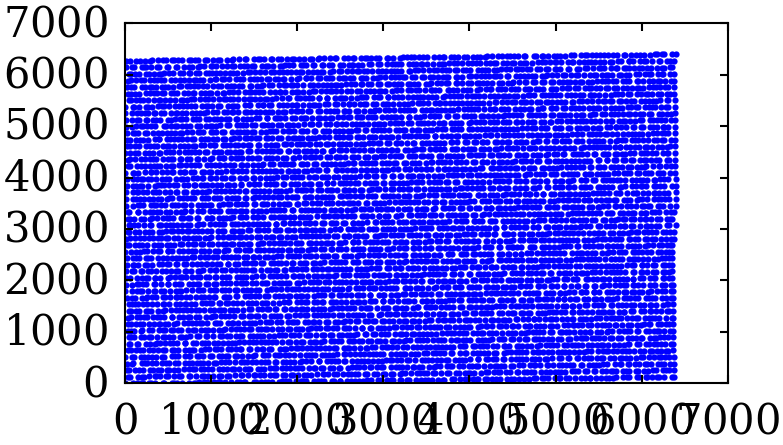

In [11]:
fig, ax = plt.subplots()
ax.plot(scan.ascending_order, '.')

In [12]:
s0 = scan.stream_arrays[0]
s49 = scan.stream_arrays[49]

In [13]:
s0.sample_time.min()

0.0

In [14]:
s0.sample_time.max()

1.040416

In [15]:
s0.epoch

1462810813.77315

In [16]:
scan.start_epoch()

1462810813.77315

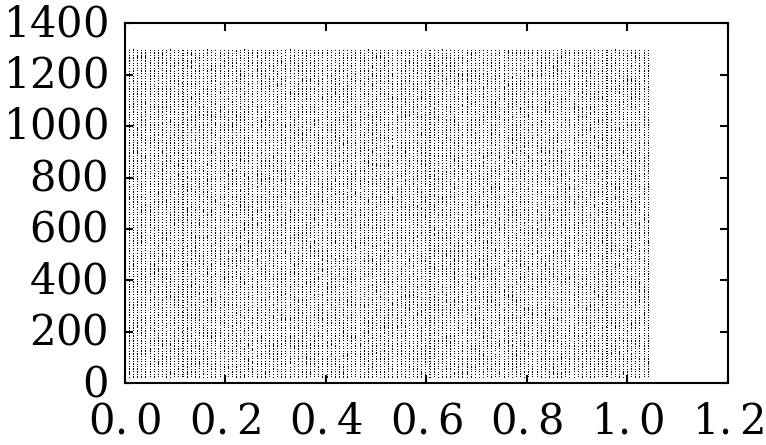

In [17]:
fig, ax = plt.subplots()
for number in range(s0.tone_index.size):
    stream = s0.stream(number)
    ax.plot(stream.sample_time, 10 * number + 20*np.log10(np.abs(stream.s21_raw)), ',k')

In [18]:
np.sum(~np.isnan(scan.s21_raw_mean))

0

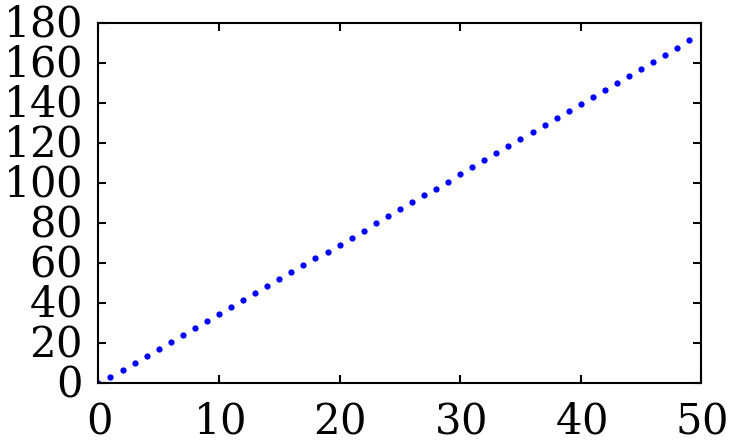

In [19]:
fig, ax = plt.subplots()
for n, s in enumerate(sa.stream_arrays):
    ax.plot(n, s.epoch - s0.epoch, '.b')

In [20]:
s0.tone_bin.size

128

In [21]:
s0.s21_raw.shape

(128, 32514)

In [22]:
s0.tone_bin.size

128

In [23]:
s0.s21_raw.size

4161792

In [24]:
np.sum(np.isnan(s0.s21_raw))

4129024

In [25]:
np.sum(np.isnan(s49.s21_raw))

4129024

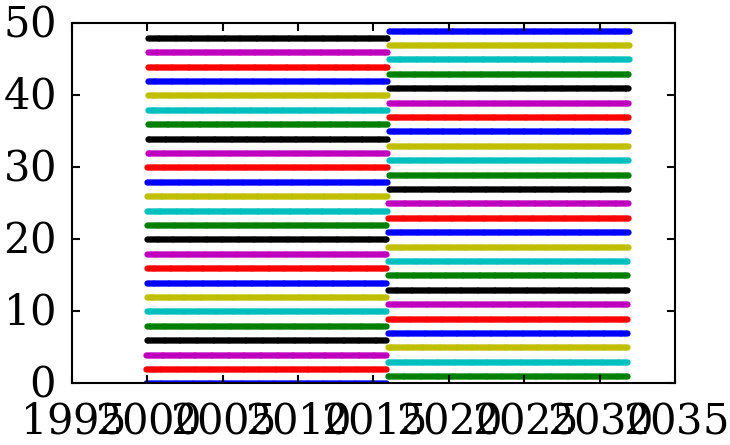

In [16]:
fig, ax = plt.subplots()
for n, s in enumerate(sa.stream_arrays):
    ax.plot(s.frequency_MHz, n * np.ones_like(s.tone_index), '.')